<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="180" /></center>

<br> 

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/keras-logo-2018-large-1200.png" width="600" height="200" /></center>
                                                                                                           
                                                                                                          

### Table of Content


1. [Linear Regression in Keras](#section1)<br>
2. [Logistic Regression in Keras](#section2)<br>
3. [Multiclass Logistic Regression in Keras](#section3)<br>


<a id=section1></a>

## 1. Linear Regression in Keras

<img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/linear_regression.png" style="width: 600px;"/>                                                                                              
Despite the implications of the above image, linear regression is quite simple. As we have already studied, linear regression is useful for __finding relationship between two continuous variables__. One is __predictor or independent variable__ and other is __response or dependent variable__.

The core idea is to obtain a __line that best fits the data__. The best fit line is the one for which __total prediction error (all data points) is as small as possible__. Error is the distance between the point to the regression line.

Let's try basic regression in Keras - 

### 1. Import the Libraries
* NumPy is the omnipresent library for machine learning in Python.
* Keras has a default Sequential model which refers to a linear stack of layers. In our current example, we only need the one hidden layer.
* A dense layer, as explained previously has each of its neurons connected to every neuron in the previous layer.
* We also need `matplotlib` for plotting out our prediction.

In [ ]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

TensorFlow 2.x selected.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Prepare the Data
We use random seeds to generate data within the range (-1,1).

In [ ]:
np.random.seed(1337)                                                # just a random number seed for reproducibility
X = np.linspace(-1, 1, 200)                                         # create 200 x values between [-1,1]
np.random.shuffle(X)                                                # randomize the data
y = 2 * X + np.random.randn(*X.shape) * 0.33                        # create 200 y values randomized by the seed

### 3. Plot the Data
We use matplotlib to __check how our data is distributed.__ This gives us a good sense of how to approach the problem. For now, we are sure to use linear regression, but __visualizing the data is the key__ to applying an algorithm successfully.

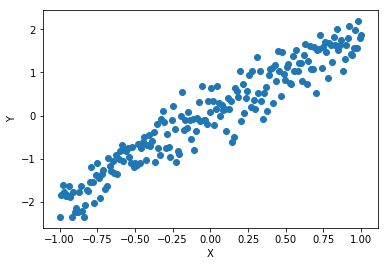

In [ ]:
# plot data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We have our initial data points. We have used a __relatively simple distribution__ for explanatory purposes.

### 4. Split the Data
Now we __split the data into train and test sets.__ This helps in __validating our model.__ If we check the accuracy of a model on a training set, it is analogous to cheating for an exam. This gives us a good idea of how well our model would actually perform on a real dataset.

In [ ]:
# train test split
X_train, y_train = X[:160], y[:160]     #split train:test in 160:40
X_test, y_test = X[160:], y[160:]  

### 5. Create a Neural Network Model
Now we create a basic neural network model using Keras' convenient syntax. We will see the details of the parameters in the Neural Network module. The focus here is how to do regression with *Keras*.

In [ ]:
model = Sequential() # Sequential -> linear stack of layers.
model.add(Dense(input_dim=1, units=1, kernel_initializer='uniform', activation='linear')) # we will study about 
# layer weight initializers and activations in a later session

__After designing__ our model, we __compile__ it. This basically means __doing forward and backward propagation iterations__. Keras handles this just with the __single line__.

In [ ]:
model.compile(loss='mse', optimizer='sgd') # loss is mean squared error, and sgd refers to Stochastic Gradient Descent.
# these parametric details will be studied in the Neural Network session.

Getting the initial weights and biases for later comparison - 

In [ ]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

Linear regression model is initialized with weight w: 0.02, b: 0.00


### 6. Train the Model
Training the model can be done in one of the following two ways - 
1. Train the model in a single line using `model.fit()`
2. Train manually by feeding the batches step-by-step

In [ ]:
# First way
model.fit(X_train, y_train, epochs=100, verbose=1) 
# Epochs are the number of iterations for training. Verbose can be switched to 0 if you don't want to print 
# the step-wise training loss. Try it.


Epoch 1/100
160/160 [==============================] - 0s 3ms/step - loss: 1.3486
Epoch 2/100
160/160 [==============================] - 0s 62us/step - loss: 1.2670
Epoch 3/100
160/160 [==============================] - 0s 56us/step - loss: 1.1911
Epoch 4/100
160/160 [==============================] - 0s 56us/step - loss: 1.1196
Epoch 5/100
160/160 [==============================] - 0s 87us/step - loss: 1.0531
Epoch 6/100
160/160 [==============================] - 0s 87us/step - loss: 0.9909
Epoch 7/100
160/160 [==============================] - 0s 69us/step - loss: 0.9327
Epoch 8/100
160/160 [==============================] - 0s 75us/step - loss: 0.8786
Epoch 9/100
160/160 [==============================] - 0s 75us/step - loss: 0.8282
Epoch 10/100
160/160 [==============================] - 0s 75us/step - loss: 0.7806
Epoch 11/100
160/160 [==============================] - 0s 75us/step - loss: 0.7367
Epoch 12/100
160/160 [==============================] - 0s 56us/step - loss: 0.6950
Ep

A __good indication of how well the model performs__ can be seen as the __loss/cost decreases.__ 

Note that __if you have executed the above code block once__ in the notebook, the model is defined and its parameters are set, meaning that the __loss will already be at the minimum.__ This is why the second way below has its loss already minimized. You can __refresh the notebook to retrain the model from start.__

In [ ]:
# Second way
for step in range(101):
    cost = model.train_on_batch(X_train, y_train)
    if step % 10 == 0:
        print('train cost: ', cost)

train cost:  0.11452594
train cost:  0.114482865
train cost:  0.11444531
train cost:  0.11441257
train cost:  0.11438401
train cost:  0.11435912
train cost:  0.1143374
train cost:  0.11431847
train cost:  0.114301965
train cost:  0.114287555
train cost:  0.11427499


### 7. Evaluate the Model

Now we evaluate our model on the test data. A __low cost indicates a good convergence__ of the model. Notice how the weights and biases vary from their initial values.

In [ ]:
print('\nTesting ------------')
cost = model.evaluate(X_test, y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
40/40 [==============================] - 0s 50us/step
test cost: 0.14142563939094543
Weights= [[1.9424988]] 
biases= [0.02676049]


### 8. Plot our Prediction (Optional)
We already know our model is performing well. But we want to *see* it. Enter matplotlib.
To plot our predictions vs the initial weights, we utilize the graph again.

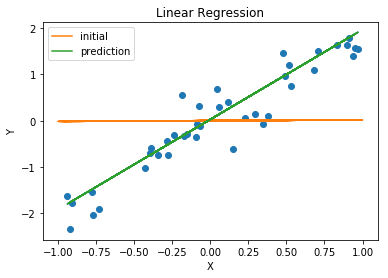

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.plot(X_train, w_init*X_train + b_init, label='initial')
plt.plot(X_test, w*X_test + b, label='prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linear Regression")
plt.legend()
plt.show()
# Bonus points for noticing the tri-colors

That is it for linear regression using Keras. Now on to classification using logistic regression.

<a id=section2></a>

## 2. Logistic Regression in Keras

<img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/Logistic-Regression-1-Neuron-1200x682.png" style="width: 600px;"/>




Logistic Regression differs from Linear in the way that we have to __classify instead of predicting a value__. In the above image, we see that the classifier built is a Dog/Not-Dog classifier. 

Logistic Regression is used when the __dependent variable(target) is categorical__.

These are examples of __binary logistic regression__. For __more than two classes__, we have a similar concept, instead we just call it __multinomial/multivariate logistic regression.__
`N` output nodes in a Logistic Regression network can be used to predict `N` different classes.

Let's try binomial Logistic Regression.
We use similar libraries for logistic regression as well - 

### 1. Importing the libraries
We use __Keras for the neural network modelling__ with __sklearn for preprocessing the data__ as well as __matplotlib for visualizing the data.__

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

c:\users\gdev\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Generating the dataset -
We use sklearn to __make blobs or random samples of data__ centred around two points for ease of visualization. We then __normalize/scale the input__ to better fit the model.

Also, we __split the data into train and test set__ to check the performance of our model later on.

In [ ]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1)
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)

# train test split
X_train, y_train = X[:160], y[:160]     #split train:test in 160:40
X_test, y_test = X[160:], y[160:] 

[1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0
 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0]


Let's see the data we created on the graph - 

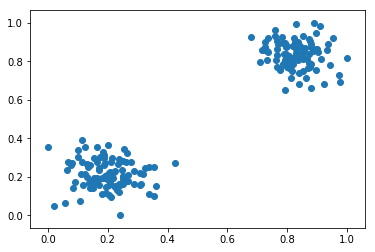

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### 3. Define the model
Now for the crux of the algorithm, we __define our neural network model.__ It takes __2 dimensions/features as input__ and gives a __single output.__ In-between we have __two hidden layers with 4 hidden units each.__ Our model looks like this ->

*[2 input nodes] -> [4 nodes hidden1] -> [4 nodes hidden2] -> [single node output]*

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Note that in the above __model summary, we don't see the input layer as it is counted as the 0th layer.__

Detailed description for activation functions, loss and optimizers will be covered later. For now, let's focus on implementing the code with Keras.

Let's check the weights and biases that have been initialized - 

In [ ]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0]
b_init = weights[1]
print("Logistic regression model is initialized with weights - {} and biases - {}".format(w_init, b_init))

Logistic regression model is initialized with weights - [[-0.9199724   0.8810086   0.98212314  0.10879111]
 [-0.3191085  -0.7047384   0.9874644  -0.5125544 ]] and biases - [0. 0. 0. 0.]


### 4. Train the Neural Network
Keras takes care of __training the model with just a single line.__ Since we specified the __metrics as 'accuracy'__ above, we can see the accuracy increasing with each epoch. This is one of the biggest advantages of using Keras over raw TensorFlow.


In [ ]:
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5795 - acc: 0.4937
Epoch 2/100
160/160 [==============================] - 0s 75us/step - loss: 0.5747 - acc: 0.4937
Epoch 3/100
160/160 [==============================] - 0s 56us/step - loss: 0.5701 - acc: 0.4937
Epoch 4/100
160/160 [==============================] - 0s 56us/step - loss: 0.5653 - acc: 0.5000
Epoch 5/100
160/160 [==============================] - 0s 75us/step - loss: 0.5607 - acc: 0.5000
Epoch 6/100
160/160 [==============================] - 0s 75us/step - loss: 0.5562 - acc: 0.5062
Epoch 7/100
160/160 [==============================] - 0s 62us/step - loss: 0.5515 - acc: 0.5062
Epoch 8/100
160/160 [==============================] - 0s 56us/step - loss: 0.5469 - acc: 0.5062
Epoch 9/100
160/160 [==============================] - 0s 69us/step - loss: 0.5422 - acc: 0.5062
Epoch 10/100
160/160 [==============================] - 0s 75us/step - loss: 0.5376 - acc: 0.5062
Epoch 11/100
160/160 [========

### 5. Evaluate the Model

Finally, we may also want to see how our weights and biases have been updated along with the decrease in cost - 

In [ ]:
print('\nTesting ------------')
cost = model.evaluate(X_test, y_test, batch_size=40)
print('test cost:', cost)
weights = model.layers[0].get_weights()
W = weights[0]
b = weights[1]
print('Weights=', W, '\nbiases=', b)


Testing ------------
40/40 [==============================] - 0s 4ms/step
test cost: [0.6906261444091797, 0.6000000238418579]
Weights= [[-0.23040056 -0.56944084  0.5315294   0.0026679 ]
 [ 0.5058191  -0.75729895 -0.16045666 -0.8928783 ]] 
biases= [0. 0. 0. 0.]


That's it for binomial logistic regression with Keras. Let's do more than two classes now - 

<a id=section3></a>

## 3. Multiclass Logistic Regression in Keras

<img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/20120612-omnomnomnivore-dinosaurs-post.jpg" style="width: 400px;"/>

                                                                                                      

Multiclass classification in Keras works almost similarly as in TensorFlow, with the difference that Keras handles a lot of boilerplate code on its own. Let's take a look.

### 0. Problem Description
In this tutorial, we will again use the standard machine learning iris flowers dataset.

<img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/image/iris.jpeg" style="width: 600px;"/>

                                                                                                        

### 1. Import Classes and Functions
* We begin by importing the __functionality we require from Keras__, __data loading from pandas__ as well as __data preparation and model evaluation from scikit-learn.__

* Again, we __download the Iris dataset__ using python as shown below into a file we name raw.csv.

In [ ]:
import numpy
import pandas
import requests
import re
import seaborn

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
r = requests.get(url, allow_redirects=True)
filename = "raw.csv"
open(filename, 'wb').write(r.content)

4551

### 2. Initialize Random Number Generator
Next, we need to __initialize the random number generator__ to a constant value (7). This will come handy later on for shuffling our dataset.

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

### 3. Load The Dataset
The dataset can be loaded directly. Because the output variable contains strings, it is __easiest to load the data using pandas.__ We can then __split the attributes (columns) into input variables (X) and output variables (Y).__

In [ ]:
#load the dataset into memory
dataset = pandas.read_csv('raw.csv', header=None, names=['sepal_length','sepal_width','petal_length','petal_width','species'])
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 4. Encode The Output Variable
* The output variable contains three different string values.
* We have already seen how we do categorical encoding for varibles in the TensorFlow notebook. Again, for multiclassification, we create dummy variables from a categorical variable.

In [ ]:
from sklearn.preprocessing import LabelBinarizer
species_lb = LabelBinarizer()
dummy_y = species_lb.fit_transform(dataset.species.values)

from sklearn.preprocessing import normalize
FEATURES = dataset.columns[0:4]
X_data = dataset[FEATURES].as_matrix()
X = normalize(X_data)

### 5. Define The Neural Network Model
* The Keras library provides __wrapper classes to allow you to use neural network models developed with Keras in scikit-learn.__

* The network topology of this simple one-layer neural network can be summarized as: 

*4 inputs -> [8 hidden nodes] -> 3 outputs*

In [ ]:
def baseline_model():
    # define baseline model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

### 6. Evaluate The Model with k-Fold Cross Validation (Data Partitioning)
* The scikit-learn has excellent capability to evaluate models using a suite of techniques. The __gold standard for evaluating machine learning models is k-fold cross validation.__

* Here, we set the number of folds to be 10 and to shuffle the data before partitioning it.

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

Evaluating the model returns an object that describes the evaluation of the 10 constructed models for each of the 10 different splits of the dataset.

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline accuracy: %.2f%% Standard deviation - (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline accuracy: 96.67% Standard deviation - (4.47%)


### 7. Observing Performance
* We know that the __probability prediction for binary classification is defined as__

    $y = 1/(1+e^{-(b0+b1X)})$
    

* __For multiclass classification__, we can define the __probability as__

    $y = 1/(1+e^{-(b0+b1X1+b2X2+....)})$
* Here, b1, b2, b3, b4 are sepal length, width, petal length and width respectively. b0 is the bias which we add separately.
* Let us take an example of the first example flower and watch how these features affect this probability - 

In [ ]:
import numpy as np
print (X[0],dummy_y[0])

[0.80377277 0.55160877 0.22064351 0.0315205 ] [1 0 0]


Note that the y output for this is the __one-hot encoded array *[1 0 0]* indicating this flower is actually *iris-Setosa*.__

Now let's check what our model predicts for this flower - 

In [ ]:
predictions = model.predict(X)
print(predictions[0])
print(np.argmax(predictions[0])+1)

[0.36169004 0.3089772  0.32933268]
1


Our model gives the __highest probability to the first flower, i.e. iris-Setosa, which is correct.__

Now let's __modify the first input feature gradually to see how the prediction changes__ -

In [ ]:
X_copy = np.copy(X)                                                          # We don't want to alter original dataset
dummy_sepal_length = 0.1
print("                Input Features                   One-Hot Label        Model Probability Prediction       Class Prediction")
for i in range(10):
    X_copy[0][0] = i * dummy_sepal_length
    #print (X[136],dummy_y[136])
    predictions = model.predict(X_copy)
    print(X_copy[0], "      ", dummy_y[0], "      ", predictions[0],"      ", np.argmax(predictions[0])+1)

                Input Features                   One-Hot Label        Model Probability Prediction       Class Prediction
[0.         0.55160877 0.22064351 0.0315205 ]        [1 0 0]        [0.3518693  0.33144593 0.3166848 ]        1
[0.1        0.55160877 0.22064351 0.0315205 ]        [1 0 0]        [0.34940583 0.32133323 0.32926095]        1
[0.2        0.55160877 0.22064351 0.0315205 ]        [1 0 0]        [0.35016426 0.31771496 0.33212078]        1
[0.3        0.55160877 0.22064351 0.0315205 ]        [1 0 0]        [0.3520631  0.31626484 0.33167204]        1
[0.4        0.55160877 0.22064351 0.0315205 ]        [1 0 0]        [0.35396603 0.31481588 0.33121812]        1
[0.5        0.55160877 0.22064351 0.0315205 ]        [1 0 0]        [0.355873   0.31336802 0.330759  ]        1
[0.6        0.55160877 0.22064351 0.0315205 ]        [1 0 0]        [0.35778394 0.31192133 0.3302947 ]        1
[0.7        0.55160877 0.22064351 0.0315205 ]        [1 0 0]        [0.3596988  0.31047586 0.3

* Observe how the __first input feature changes with each iteration.__
* As we __increase sepal length, the probability prediction for the 1st species increases__, while it decreases for others.
* This indicates that __higher sepal length is associated with the 1st species i.e. Setosa.__
* Now let's try it with each of the other input features - 

In [ ]:
X_copy = np.copy(X)                                                          # We don't want to alter original dataset
dummy_sepal_width = 0.1
print("                Input Features                   One-Hot Label        Model Probability Prediction       Class Prediction")
for i in range(10):
    X_copy[0][1] = i * dummy_sepal_length
    #print (X[136],dummy_y[136])
    predictions = model.predict(X_copy)
    print(X_copy[0], "      ", dummy_y[0], "      ", predictions[0],"      ", np.argmax(predictions[0])+1)

                Input Features                   One-Hot Label        Model Probability Prediction       Class Prediction
[0.80377277 0.         0.22064351 0.0315205 ]        [1 0 0]        [0.33040413 0.29648072 0.37311515]        3
[0.80377277 0.1        0.22064351 0.0315205 ]        [1 0 0]        [0.33872813 0.2999654  0.3613065 ]        3
[0.80377277 0.2        0.22064351 0.0315205 ]        [1 0 0]        [0.345915   0.30379283 0.3502922 ]        3
[0.80377277 0.3        0.22064351 0.0315205 ]        [1 0 0]        [0.3530647 0.3075039 0.3394314]        1
[0.80377277 0.4        0.22064351 0.0315205 ]        [1 0 0]        [0.35887676 0.3109337  0.3301895 ]        1
[0.80377277 0.5        0.22064351 0.0315205 ]        [1 0 0]        [0.3607557  0.30994356 0.32930067]        1
[0.80377277 0.6        0.22064351 0.0315205 ]        [1 0 0]        [0.36256656 0.30807233 0.3293611 ]        1
[0.80377277 0.7        0.22064351 0.0315205 ]        [1 0 0]        [0.36437902 0.30620614 0.3294

* Here, As we increase sepal width, the probability prediction for the 1st species increases, while it decreases for others.
* This indicates that __lower sepal width corresponds to 3rd species(Virginica), while higher sepal width is associated with the 1st species i.e. Setosa.__

In [ ]:
X_copy = np.copy(X)                                                          # We don't want to alter original dataset
dummy_petal_length = 0.01
print("                Input Features                   One-Hot Label        Model Probability Prediction       Class Prediction")
for i in range(10):
    X_copy[136][1] = i * dummy_petal_length
    #print (X[136],dummy_y[136])
    predictions = model.predict(X_copy)
    print(X_copy[136], "      ", dummy_y[136], "      ", predictions[136],"      ", np.argmax(predictions[136])+1)

                Input Features                   One-Hot Label        Model Probability Prediction       Class Prediction
[0.67017484 0.         0.59571097 0.2553047 ]        [0 0 1]        [0.3448743  0.28679362 0.36833206]        3
[0.67017484 0.01       0.59571097 0.2553047 ]        [0 0 1]        [0.34551528 0.28749153 0.36699316]        3
[0.67017484 0.02       0.59571097 0.2553047 ]        [0 0 1]        [0.3461548  0.2881889  0.36565632]        3
[0.67017484 0.03       0.59571097 0.2553047 ]        [0 0 1]        [0.3467928 0.2888857 0.3643215]        3
[0.67017484 0.04       0.59571097 0.2553047 ]        [0 0 1]        [0.34742925 0.289582   0.36298874]        3
[0.67017484 0.05       0.59571097 0.2553047 ]        [0 0 1]        [0.3480642  0.29027772 0.36165807]        3
[0.67017484 0.06       0.59571097 0.2553047 ]        [0 0 1]        [0.34869766 0.29097286 0.3603295 ]        3
[0.67017484 0.07       0.59571097 0.2553047 ]        [0 0 1]        [0.34932953 0.2916674  0.3590